In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from latexify import latexify, format_axes
from scipy.special import xlogy

# Function to calculate entropy
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Generate data
x_values = np.linspace(0.000, 1.0, 100)  # Avoid log(0) in the calculation
y_values = entropy(x_values)

/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_71315/845472961.py:6: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_71315/845472961.py:6: RuntimeWarning: invalid value encountered in multiply
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


In [3]:
y_values

array([       nan, 0.08146203, 0.14257333, 0.19590927, 0.24414164,
       0.28853851, 0.32984607, 0.36855678, 0.40502013, 0.43949699,
       0.47218938, 0.50325833, 0.53283506, 0.56102849, 0.58793037,
       0.61361902, 0.63816195, 0.66161791, 0.68403844, 0.70546904,
       0.72595015, 0.74551784, 0.76420451, 0.78203929, 0.79904852,
       0.81525608, 0.83068364, 0.84535094, 0.85927598, 0.87247521,
       0.88496364, 0.89675502, 0.90786192, 0.91829583, 0.92806728,
       0.93718586, 0.9456603 , 0.95349858, 0.9607079 , 0.96729478,
       0.97326507, 0.97862399, 0.98337619, 0.98752571, 0.99107606,
       0.99403021, 0.99639062, 0.99815923, 0.9993375 , 0.9999264 ,
       0.9999264 , 0.9993375 , 0.99815923, 0.99639062, 0.99403021,
       0.99107606, 0.98752571, 0.98337619, 0.97862399, 0.97326507,
       0.96729478, 0.9607079 , 0.95349858, 0.9456603 , 0.93718586,
       0.92806728, 0.91829583, 0.90786192, 0.89675502, 0.88496364,
       0.87247521, 0.85927598, 0.84535094, 0.83068364, 0.81525

In [4]:
# Replace NaN values with 0
y_values = np.nan_to_num(y_values, nan=0.0)

In [5]:
latexify(columns=2)

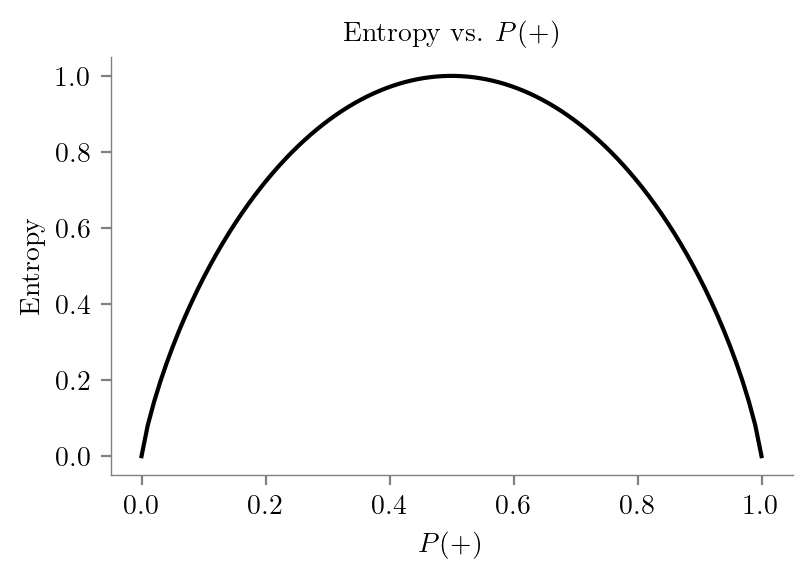

In [6]:
plt.plot(x_values, y_values, color='black')

# Set labels and title
plt.xlabel('$P(+)$')
plt.ylabel('Entropy')
plt.title('Entropy vs. $P(+)$')
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/entropy.pdf", bbox_inches="tight")

In [7]:
# Function to calculate entropy with numerical stability
def entropy_numerically_stable(p):
    return (-xlogy(p, p) - xlogy(1 - p, 1 - p))/np.log(2)

y_values = entropy_numerically_stable(x_values)

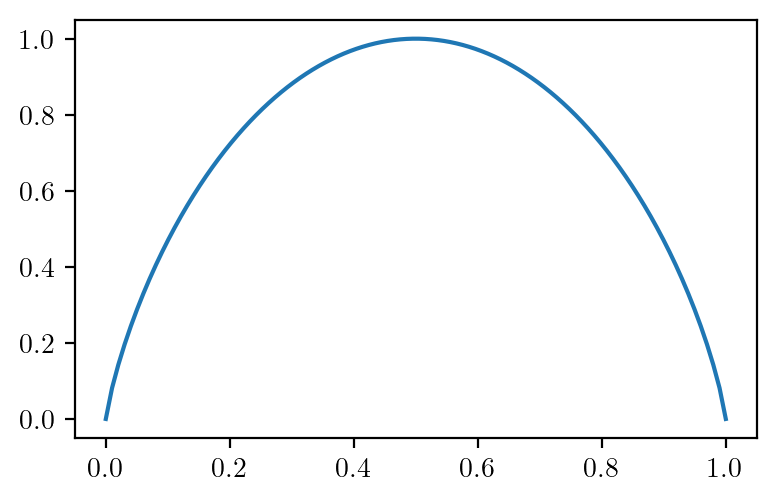

In [8]:
plt.plot(x_values, y_values)

How does `xlogy` handle the corner case?

In [9]:
xlogy??

Call signature:  xlogy(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'xlogy'>
File:            ~/miniconda3/lib/python3.9/site-packages/numpy/__init__.py
Docstring:      
xlogy(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

xlogy(x, y, out=None)

Compute ``x*log(y)`` so that the result is 0 if ``x = 0``.

Parameters
----------
x : array_like
    Multiplier
y : array_like
    Argument
out : ndarray, optional
    Optional output array for the function results

Returns
-------
z : scalar or ndarray
    Computed x*log(y)

Notes
-----
The log function used in the computation is the natural log.

.. versionadded:: 0.13.0

Examples
--------
We can use this function to calculate the binary logistic loss also
known as the binary cross entropy. This loss function is used for
binary classification problems and is defined as:

.. math::
    L = 1/n * \sum_{i=0}^n -(y_i*log(y\_pred_i) + (1-y_i)*log(1-y\_pred_i))

W